# 0. Review
## 0.A Scikit-Learn

Scikit-Learn is a machine learning python package. It allows users to access machine learning algorithms via **object-oriented programming**.

## 0.B Data Set

I will be using a dataset of avocado prices.

We would like to learn prices of avocado given brand, location sold, total demand, etc.

## 0.C Load Data

Now, we load our training and test set. Run the code below to load 

In [1]:
import pandas as pd

# load explanatory variables
avocado_training_set  = pd.read_csv("datasets/avocado_training_set",index_col=0)
avocado_training_set['year'] = avocado_training_set['year'].astype(str)
avocado_training_set['Month'] = avocado_training_set['Month'].astype(str)

avocado_test_set = pd.read_csv("datasets/avocado_test_set",index_col=0)
avocado_test_set['year'] = avocado_test_set['year'].astype(str)
avocado_test_set['Month'] = avocado_test_set['Month'].astype(str)

# load predictors
prices_training_set = pd.read_csv("datasets/avocado_prices_training_set",index_col=0)
prices_test_set = pd.read_csv("datasets/avocado_prices_test_set",index_col=0)

In the previous section, we hot-one encoded some categorical variables in the training and test set. In this section, we hot-one encode all categorical variables.

In [2]:
categorical_variables_ = ['Month','region','type','year']

# split all categorical variables for training set
avocado_split_ = pd.get_dummies(data=avocado_training_set[categorical_variables_],
                                     drop_first=True)
avocado_training_set_cleaned = pd.concat([avocado_training_set,avocado_split_], 
                                     axis=1, sort=False)
avocado_training_set_cleaned = avocado_training_set_cleaned.drop(categorical_variables_,axis=1,
                                                         inplace=False)

In [3]:
categorical_variables_ = ['Month','region','type','year']

# split all categorical variables 
avocado_split_ = pd.get_dummies(data=avocado_test_set[categorical_variables_],
                                     drop_first=True)
avocado_test_set_cleaned = pd.concat([avocado_test_set,avocado_split_], 
                                     axis=1, sort=False)
avocado_test_set_cleaned = avocado_test_set_cleaned.drop(categorical_variables_,axis=1,
                                                         inplace=False)

**In this section, we will learning how to certain the most accurate linear regression model using our training data.**

# 10.A Linear Regression

2. Then, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

Linear regression assumes that there is a *linear* relationship between the explanatory variables and the outcome. 

That our case linear regression means that price does up or down, but not both, at a constant rate if an explanatory variable increases.

Thus, linear regression assumes a linear model of price

$$\text{Price} = \beta_0 + \beta_1 \text{Total Volume} + \beta_2 \text{Year} + \beta_3 \text{Month} + \beta_4 \text{Type}.$$

In a linear regression model, we aim learn the coefficients, $\beta_0 ,\beta_1 ,\beta_2 ,\beta_3,\beta_4$ that minimizes the mean squared error between the model and true response variables (prices). 

That is,
$$\min_{\beta_0 ,\beta_1 ,\beta_2 ,\beta_3,\beta_4} \frac{1}{N}\sum_{i=1}^{N}\left(y_i - \beta_0 + \beta_1 \text{Total Volume}_i + \beta_2 \text{Year}_i + \beta_3 \text{Month}_i + \beta_4 \text{Type}_i\right)^2$$

In learning a model, we will be to predict future prices and study how the explanatory variables affect price.
    
## 10.B Check Training Set

Let's check if we loaded the correct dataset.

In [4]:
#print head of labels_training_set
prices_training_set.head()

,AveragePrice
Observation 3272,1.01
Observation 8240,1.48
Observation 11769,1.63
Observation 1742,0.70
Observation 5981,0.67


In [5]:
#print head of  DNA_training_set

avocado_training_set_cleaned.head()

,4046,4225,4770,Large Bags,Small Bags,Total Volume,XLarge Bags,Month_10,Month_11,Month_12,...,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic,year_2016,year_2017,year_2018
Observation 3272,10.080124,13.205734,11.820667,7.783766,11.388065,13.584884,0.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Observation 8240,7.364737,10.693653,4.738389,7.641209,9.117004,10.971312,7.107425,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Observation 11769,6.669688,2.102914,0.000000,0.000000,7.653338,7.974880,0.000000,0,0,0,...,0,0,1,0,0,0,1,0,0,0
Observation 1742,13.412152,12.080050,8.393972,9.991916,11.348697,13.770007,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Observation 5981,15.198407,15.082572,12.274380,8.966972,15.040339,16.232638,10.843619,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
avocado_training_set_cleaned.columns

Index(['4046', '4225', '4770', 'Large Bags', 'Small Bags', 'Total Volume',
       'XLarge Bags', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_California',
       'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_GreatLakes',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelp

## 10.C Statistical Analysis

In the avocado dataset, we have many explanatory variables. **How do we pick the explanatory variables that best explain the variation in the prices?**

Interestingly, any random explanatory variable (as long as this variable is not colinear with another explanatory variable) will increase the $R^2$ value. Thus, increasing the accuracy of the dataset. However, this increase in accuracy may be insignificant. **How determine explanatory variables meaningfully reduce the error in the model?**

Typically, one uses Anova and p-values of coefficients to choose to the ```best``` explanatory variable.

*Neither does Scikit-learn allow for Anova to compare linear model nor does Scikit-learn  compute P values of coefficients of a linear model.* 

If you would like to do such statistical analysis, you need to use the ```statsmodels``` package. There maybe a workshop on this package in the summer.

While Scikit cannot do such analysis, I argue that Anova and p-values are not the most effective ways of comparing linear models. 

- Anova depends on the order of term by term comparison
- p-values of coefficients change depending other coefficients used in the model.

## 10.D Overfitting

It is important that we choose the most variables to put in the linear model. It is also important we do *overfit*. Overfitting is learning the training set too closely. 

Any sample population is not representative of the general population. Additionally, most data contain noise. A model that learns the training set to the T can reproduce behaviors that are mostly seen in the sample population.


The test error is a heuristic used to measure fidelity to the general population. The test set is another sample of the general population that the model has not seen before. If the model performs poorly on the test set, then it is likely to perform poorly on the general population. 

# 10.E.1 Model Selection: LASSO

LASSO is a reformulation of the linear regression problem that removes coefficients that do not decrease the training error by a relatively large amount.

Previously, we had the regression problem as: 
$$\min_{\beta_0 ,\beta_1 ,\beta_2 ,\beta_3,\beta_4} \sum_{i=1}^{N}\left(y_i - \left(\beta_0 + \beta_1 \text{Total Volume}_i + \beta_2 \text{Year}_i + \beta_3 \text{Month}_i + \beta_4 \text{Type}_i\right)\right)^2.$$

LASSO reformulates the regression as:

$$\min_{\beta_0 ,\beta_1 ,\beta_2 ,\beta_3,\beta_4} \sum_{i=1}^{N}\left(y_i - \left(\beta_0 + \beta_1 \text{Total Volume}_i + \beta_2 \text{Year}_i + \beta_3 \text{Month}_i + \beta_4 \text{Type}_i\right)\right)^2 + \alpha \sum_{j=1}^{4}|\beta_j|.$$

$\alpha$ weighs eliminating non-zero coefficients against a decrease in training error.

### 10.E.2 Building a linear model with ```Lasso```

#### I. Initialize linear model 

In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, fit_intercept=True, normalize=False)

#### II. Fitting linear model

In [8]:
explanatory_data= avocado_training_set_cleaned[['Total Volume','year_2016',
                                                'year_2017', 'year_2018']]

lasso.fit(explanatory_data,prices_training_set)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### III. Getting parameters

In [9]:
lasso.coef_

array([-0.10142688, -0.        ,  0.12983296,  0.        ])

In [10]:
lasso.intercept_

array([2.51124165])

#### IV. Interpretting model 

Our model is now 

$$\text{Price} =2.5112 -0.1014\times\text{Total Demand} + 0.1298 \times \text{year_2017}.$$

Note that our regression model without regularization was

$$\text{Price} = 2.5260 -0.1040 \times \text{Log(Total Demand)}-0.0106 \times \text{year_2016} + 0.1767\times\text{year_2017}+ 0.04261\times\text{year_2018}.$$

We can interpret this reduction in our model as:

"*given $\alpha=0.01$, $\text{year_2016}$ and $\text{year_2018}$ did not provide a large enough reduction in the training error to retain*."

#### V. Plotting model

In [11]:
# predicted price
predict_training_prices_ = lasso.predict(explanatory_data)

# create index of variables that are 2017 and not 2017 
year_2017 = avocado_training_set_cleaned['year_2017'].astype(bool)
year_not_2017 = (year_2017 == False)

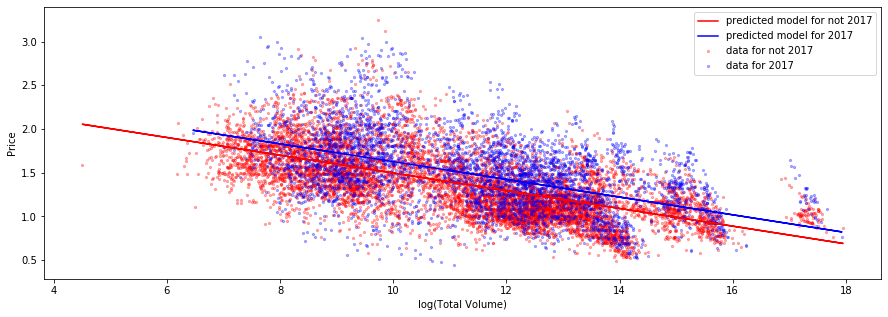

In [12]:
#initialize plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))

list_years = [year_not_2017,year_2017]
years = ["not 2017","2017"]
colors = ['r','b']
legend_name_scatter= []
legend_name_line= []
for i in range(len(list_years)):
    indices = list_years[i]
    # get data
    training_total_volume_year_ = avocado_training_set_cleaned.loc[indices,"Total Volume"]
    training_price_year_ = prices_training_set[indices]
    predicted_training_prices_year = predict_training_prices_[indices]


    # scatter plot of the demand 
    plt.scatter(training_total_volume_year_, training_price_year_ , s=5,
                alpha=0.3,color=colors[i])
    # plot of linear model 
    plt.plot(training_total_volume_year_, predicted_training_prices_year,c=colors[i])
    legend_name_scatter.extend(['data for ' + years[i]])
    legend_name_line.extend(['predicted model for ' + years[i]])
legend_name_line.extend(legend_name_scatter)
plt.xlabel('log(Total Volume)')
plt.ylabel('Price')
plt.legend('')
plt.legend(legend_name_line)
plt.show()

### 10.E.3 Exercise: Building a linear model with ```Lasso``` with a large $\alpha$

Following the instructions above and the explanatory variables, ```['Total Volume','year_2016','year_2017', 'year_2018']```, build a linear model with Lasso and set ```alpha=1.0```. 

Print the coefficients of the linear model and compare these coefficients to those of the linear model without regularization:

$$\text{Price} = 2.5260 -0.1040 \times \text{Log(Total Demand)}-0.0106 \times \text{2016_year} + 0.1767\times\text{2017_year}+ 0.04261\times\text{2018_year}.$$


In [13]:
# enter solution here

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, fit_intercept=True, normalize=False)
explanatory_data= avocado_training_set_cleaned[['Total Volume','year_2016',
                                                'year_2017', 'year_2018']]
lasso.fit(explanatory_data,prices_training_set)
print(lasso.coef_)
print(lasso.intercept_)

[-0. -0.  0. -0.]
[1.40407155]


### 10.E.4 Exercise: Building a linear model with ```Lasso``` with a small $\alpha$

Following the instructions above and the explanatory variables, ```['Total Volume','year_2016','year_2017', 'year_2018']```, build a linear model with Lasso and set ```alpha= 1e-6```. 

Print the coefficients of the linear model and compare these coefficients to those of the linear model without regularization:

$$\text{Price} = 2.5260 -0.1040 \times \text{Log(Total Demand)}-0.0106 \times \text{2016_year} + 0.1767\times\text{2017_year}+ 0.04261\times\text{2018_year}.$$


In [14]:
# enter solution here
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1e-6, fit_intercept=True, normalize=False)
explanatory_data= avocado_training_set_cleaned[['Total Volume','year_2016',
                                                'year_2017', 'year_2018']]
lasso.fit(explanatory_data,prices_training_set)
print(lasso.coef_)
print(lasso.intercept_)

[-0.10400901 -0.01062718  0.17672741  0.04258284]
[2.52603351]


# 10.F Choosing the best $\alpha$

Varying $\alpha$ drastically affect the model we learn. Is there an alpha that most help us find the most effective model?

## 10.F.1 Cross Validation


Ideally, we would like to find an $\alpha$ that minimizes model error in the general population.

<img src="images/10_alpha_model_error.png" alt="Drawing" style="width: 500px;"/>

$\alpha$ is a hyperparameter of machine learning model. A hyperparameter is value that must be set before learning begins.

In machine learning, hyperparameters are learnt using *cross validation*. 

Cross validation is process by which a dataset into smaller datasets and hyperparameters that minimizes the average error on the sub-datasets are learn.


## 10.F.2 Process of Cross Validation

1) Divide the dataset into *folds*. Folds are smaller datasets of a larger dataset.

<img src="images/10_folds.png" alt="Drawing" style="width: 500px;"/>

2) Set the hyperparameter to an intelligent guess.

3) A fold is then removed and, given the hyperparameter above, the model is trained on the remaining folds.

<img src="images/10_cross_validation.png" alt="Drawing" style="width: 500px;"/>

4) Repeat step 3 repeat until each fold as been removed at least once.

5) Vary the hyperparameter.

6) Repeat Steps 3-4.

7) Repeat steps 5-6 until varying hyperparameter always leads to an increase in model error.

**Note: If you divide your dataset into $k$ folds, the cross validation is called *k-fold cross validation*.**

**If you divide your dataset so that each fold contains one data point, the cross validation is called *leave-one-out cross validation*.**


## 10.F.3 Cross Validation in Scikit-Learn

To do a hyperparameter search using the cross validation, we use the ```GridSearchCV``` class. It takes as argument:
- the estimator object you are using
- the hyperparameter points to check
- the scoring method used, for example mean squared error
- the number of folds

#### I. Initialize ```GridSearchCV```

In [15]:
from sklearn.model_selection import GridSearchCV


lasso = Lasso()
# set parameter grid
param_grid = {'alpha' : [1.0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]}

lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error',cv=10)

II. Learn best hyperparameter 

In [16]:
explanatory_data= avocado_training_set_cleaned[['Total Volume','year_2016',
                                                'year_2017', 'year_2018']]
lasso_cv.fit(explanatory_data,prices_training_set)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
best_params_ = lasso_cv.best_params_
print(best_params_)
best_alpha=best_params_['alpha']
print(best_alpha)

{'alpha': 1e-05}
1e-05


#### III. Retrain Linear Model

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=best_alpha, fit_intercept=True, normalize=False)
explanatory_data= avocado_training_set_cleaned[['Total Volume','year_2016',
                                                'year_2017', 'year_2018']]
lasso.fit(explanatory_data,prices_training_set)
print(lasso.coef_)
print(lasso.intercept_)

[-0.10400579 -0.01062989  0.17666686  0.04242664]
[2.52602822]


Given the choice of variables ```'Total Volume','year_2016', 'year_2017', 'year_2018'```, ```LASSO``` finds the best model to be

$$\text{Price} = 2.6749 -0.122 \times \text{Log(Total Demand)}-0.0027 \times \text{2016_year} + 0.1988\times\text{2017_year}+  0.0481\times\text{2018_year}.$$

## 10.F.4 Exercise: Cross Validation with LassoCV.

Using Lasso with cross validation is so common that scikit-learn created a class for it! It is alot simplier than using ```GridSearchCV```. 

With the explanatory variables, ['Total Volume','year_2016','year_2017', 'year_2018'], and response variable, ```prices_training_set```, follow the steps below use ```LassoCV```.


#### I. Initialize

First, you need to initialize ```LassoCV```. It takes arguments:

- ```alphas``` - a list of alphas
- ```cv``` - the number of folds.

I set the values of arguments below. ```LassoCV``` computes the mean squared error on the remaining folds.

#### II. Fitting 

Next, you need to fit your instance of ```LassoCV``` to the training data. Use ```explanatory_data``` and ```training_response``` to fit your model.

#### III. Get best alpha

After getting the best fitting your instance, ```LassoCV``` stores the best alpha as ```alpha_```. Get the best alpha and store it as ```best_alpha.``` Print the best alpha.

#### IV. Get model parameters

```LassoCV``` also refits ```Lasso``` to the model explanatory data using the best alpha found above. It stores the coefficients, ```coef_``` and ```intercept_```, of Lasso with best alpha. Print these coefficients and interpret associated model.

In [19]:
#explanatory variables
explanatory_data= avocado_training_set_cleaned[['Total Volume','year_2016',
                                                'year_2017', 'year_2018']]

training_response = prices_training_set.values.ravel()
# reformat prices 
# load LassoCV

from sklearn.linear_model import LassoCV
import numpy as np
# set LassoCV arguments
alpha_list = np.logspace(0,-9,num=10) # list of alphas
k = 10 # number of folds

In [20]:
# enter solution for I here
# initialize LassoCV

lasso_cv = LassoCV(alphas=alpha_list,cv = k)

In [21]:
# enter solution for II here
# fit LassoCV

lasso_cv.fit(explanatory_data,training_response)

LassoCV(alphas=array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [22]:
# enter solution for III here
# get best alpha
best_alpha = lasso_cv.alpha_
print(best_alpha)

1e-05


In [23]:
# enter solution for IV here
# get best alpha
print(lasso_cv.coef_)
print(lasso_cv.intercept_)

[-0.10400579 -0.01062989  0.17666686  0.04242664]
2.5260282167428985


## 10.F.5 Exercise: Cross Validation with LassoCV.

Repeat the steps in the exercise above to find the best alpha with the explanatory variables, ['Total Volume','type_organic','year_2016','year_2017', 'year_2018'], and response variable, ```prices_training_set```.

Train ```Lasso``` with the best alpha found.

In [24]:
#explanatory variables
explanatory_data= avocado_training_set_cleaned[['Total Volume','type_organic','year_2016',
                                                'year_2017', 'year_2018']]

training_response = prices_training_set.values.ravel()
# reformat prices 
# load LassoCV

from sklearn.linear_model import LassoCV
# set LassoCV arguments

import numpy as np
alpha_list=np.logspace(0,-9,num=20)
k = 10

In [25]:
# enter solution here to train LassoCV

# initialize LassoCV
lasso_cv = LassoCV(alphas=alpha_list,cv = k)
# fit LassoCV
lasso_cv.fit(explanatory_data,training_response)
# get best alpha
best_alpha = lasso_cv.alpha_
print(best_alpha)

0.00016237767391887227


In [26]:
print(lasso_cv.coef_)
print(lasso_cv.intercept_)

[-0.04790003  0.32038406 -0.02728927  0.15117733  0.        ]
1.7465145138413196


Given the choice of variables ```'Total Volume','type_organic','year_2016', 'year_2017', 'year_2018',``` LASSO finds the best model to be```LASSO``` finds the best model to be

$$\text{Price} = 1.7465 -0.0479 \times \text{Log(Total Demand)} + 0.3203\times\text{type_organic}-0.0272 \times \text{year_2016} +0.1511\times\text{year_2017}$$